In [4]:
import os
os.environ["HF_ENDPOINT"] = "https://hf-mirror.com"

In [5]:
from transformers import GPT2LMHeadModel
model_hf = GPT2LMHeadModel.from_pretrained("gpt2")
sd_hf = model_hf.state_dict()

for k,v in sd_hf.items():
    print(k,v.shape)

transformer.wte.weight torch.Size([50257, 768])
transformer.wpe.weight torch.Size([1024, 768])
transformer.h.0.ln_1.weight torch.Size([768])
transformer.h.0.ln_1.bias torch.Size([768])
transformer.h.0.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.0.attn.c_attn.bias torch.Size([2304])
transformer.h.0.attn.c_proj.weight torch.Size([768, 768])
transformer.h.0.attn.c_proj.bias torch.Size([768])
transformer.h.0.ln_2.weight torch.Size([768])
transformer.h.0.ln_2.bias torch.Size([768])
transformer.h.0.mlp.c_fc.weight torch.Size([768, 3072])
transformer.h.0.mlp.c_fc.bias torch.Size([3072])
transformer.h.0.mlp.c_proj.weight torch.Size([3072, 768])
transformer.h.0.mlp.c_proj.bias torch.Size([768])
transformer.h.1.ln_1.weight torch.Size([768])
transformer.h.1.ln_1.bias torch.Size([768])
transformer.h.1.attn.c_attn.weight torch.Size([768, 2304])
transformer.h.1.attn.c_attn.bias torch.Size([2304])
transformer.h.1.attn.c_proj.weight torch.Size([768, 768])
transformer.h.1.attn.c_proj.bias 

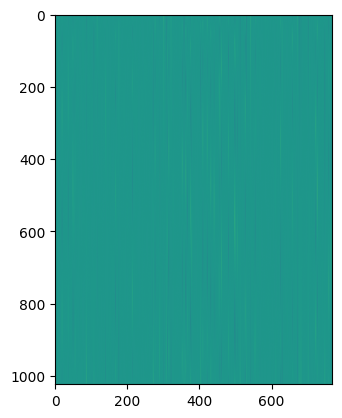

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(sd_hf["transformer.wpe.weight"])

In [7]:
from transformers import pipeline,set_seed
generator = pipeline("text-generation",model="gpt2")
set_seed(42)
generator("Hello, I'm a language model,",max_length = 30,num_return_sequences = 5)

Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'Hello, I\'m a language model, so you can\'t define something in any other language. Let me introduce another topic:\n\nThe name "'},
 {'generated_text': "Hello, I'm a language model, you know.\n\nThat's right… I have a lot of friends who don't know what I do"},
 {'generated_text': "Hello, I'm a language model, not a formal one. I'm more interested in languages than formal models and I'm going to use the formal"},
 {'generated_text': "Hello, I'm a language model, which means that if you're a language designer, you need some understanding of the language model so you can build"},
 {'generated_text': "Hello, I'm a language model, and now it's time to figure out where I want to focus my efforts.\n\nLet's imagine that"}]

In [ ]:
import torch
from transformers import GPT2LMHeadModel
import torch.nn.functional as F
model = GPT2LMHeadModel.from_pretrained("gpt2")
model.eval()
model.to("cuda")

import tiktoken

num_return_sequences = 5
max_length = 30

tokenizer = tiktoken.get_encoding("gpt2")
tokens = tokenizer.encode("Hello, I'm a language model,")
tokens = torch.tensor(tokens, dtype=torch.long)
tokens = tokens.unsqueeze(0).repeat(num_return_sequences, 1)

x = tokens.to("cuda")

torch.manual_seed(42)
torch.cuda.manual_seed(42)

while x.size(1) < max_length:
    with torch.no_grad():
        logits = model(x)[0]
        logits = logits[:, -1, :]
        topk_probs, topk_indices = torch.topk(F.softmax(logits, -1), 50)
        ix = torch.multinomial(topk_probs, 1)
        xcol = torch.gather(topk_indices, -1, ix)
        x = torch.cat((x, xcol), dim=-1)
for i in range(num_return_sequences):
    tokens = x[i, :].tolist()
    print(">", tokenizer.decode(tokens))

> Hello, I'm a language model, not a model of semantics.

With this in mind, here's how the implementation of your language looks
> Hello, I'm a language model, not an API. I don't do anything at all to get the API running… There's no API for
> Hello, I'm a language model, a model of logic. You understand how to use it when you're talking to me," he said.

> Hello, I'm a language model, not a program. I don't understand many things. I don't understand the basics of Java. But I
> Hello, I'm a language model, it's almost like a model of reality," she said.

Kris has been trying to do the
